In [4]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [8]:
print(market_data_df.columns)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns_to_scale = [
    'price_change_percentage_24h', 
    'price_change_percentage_7d',
    'price_change_percentage_14d', 
    'price_change_percentage_30d',
    'price_change_percentage_60d', 
    'price_change_percentage_200d',
    'price_change_percentage_1y'
]


if all(col in market_data_df.columns for col in columns_to_scale):
    # Initialize the scaler
    scaler = StandardScaler()

    # Fit and transform the data
    scaled_data = scaler.fit_transform(market_data_df[columns_to_scale])

    # Create a new DataFrame with the scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=market_data_df.index)

    # Optionally, merge the scaled data back with the original DataFrame (excluding the original unscaled columns)
    final_df = market_data_df.drop(columns_to_scale, axis=1).join(scaled_df)

    # Display the first few rows of the scaled DataFrame
    print(final_df.head())
    scaler = StandardScaler()

else:
    print("Some of the specified columns are missing in the DataFrame.")


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [10]:
# Create a DataFrame with the scaled data
final_df

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [11]:
from sklearn.cluster import KMeans

### Find the Best Value for k Using the Original Scaled DataFrame.

In [12]:

inertia = []
k_values = list(range(1, 12))

for i in k_values:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(final_df)
    inertia.append(k_model.inertia_)

print(inertia)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

[287.0, 212.1233420748626, 170.193570879703, 79.02243535120975, 71.0979135124442, 66.10882678044752, 54.48812315624117, 43.22469266658042, 32.86088447122681, 28.404884636873092, 24.116198421409198]


C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

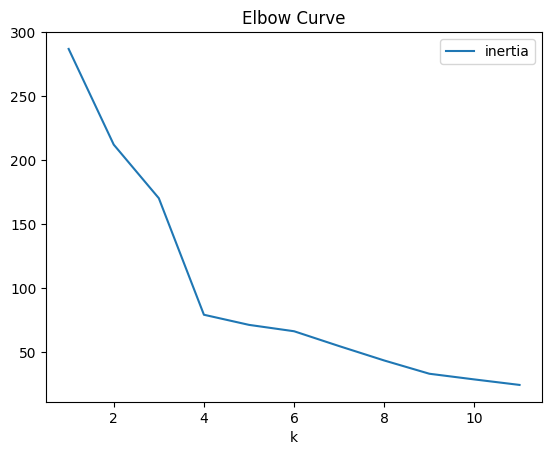

In [13]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve")

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(final_df)

C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(final_df)

# View the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [17]:
# Create a copy of the DataFrame
copy_df = final_df.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
copy_df["predicted_clusters"] = clusters

# Display sample data
copy_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


C:\Users\jandr\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

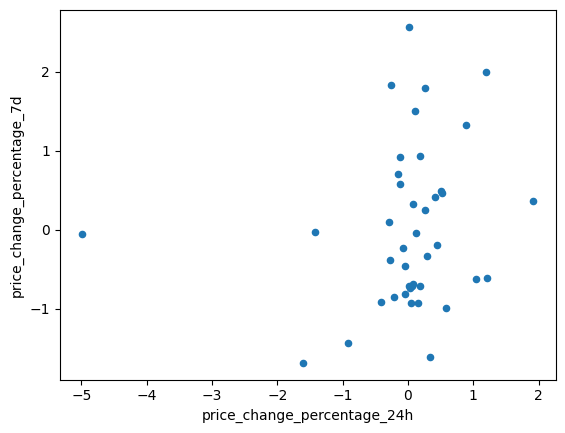

In [19]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copy_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    colormap='rainbow')

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

pca_data = pca.fit_transform(final_df)
# View the first five rows of the DataFrame. 

import pandas as pd

# Convert the NumPy array to a DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# View the first five rows
print(pca_df.head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [22]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  89.5%

In [23]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
new_pca_df = pca_df.copy()

# Creating a DataFrame with the PCA data
new_pca_df

# Copy the crypto names from the original data
new_pca_df.index = copy_df.index

new_pca_df


# Set the coinid column as index


# Display sample data


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values2 = list(range(1, 12))
k_values2


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_pca_df)
    inertia_values.append(kmeans.inertia_)

inertia_values

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(range(1, 12)),  
    "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
elbow_df

C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

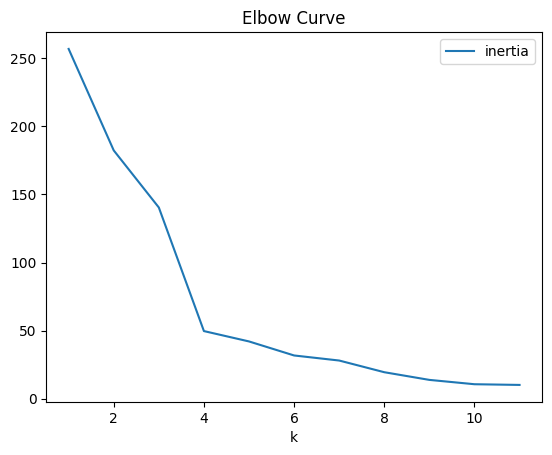

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_df.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve")


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [27]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(new_pca_df)

C:\Users\jandr\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(new_pca_df)


# Print the resulting array of cluster values.
print("Cluster values:", predicted_clusters)

Cluster values: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [29]:
# Create a copy of the DataFrame with the PCA data

pca_df_with_clusters = new_pca_df.copy()
# Add a new column to the DataFrame with the predicted clusters
pca_df_with_clusters["Cluster"] = predicted_clusters

# Display sample data
pca_df_with_clusters

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0


In [30]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

scatter_plot = pca_df_with_clusters.hvplot.scatter(
    x="PC1", 
    y="PC2", 
    c="Cluster", 
    colormap="viridis", 
    size=100, 
    title="Cryptocurrency Clusters (PCA1 vs PCA2)"
)

scatter_plot


:Scatter   [PC1]   (PC2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [31]:
# Use the columns from the original scaled DataFrame as the index.
pca_df_with_clusters.index = new_pca_df.index

In [32]:
# Assuming `pca` is the fitted PCA model and `scaled_df` is the original scaled DataFrame
component_loadings = pd.DataFrame(
    pca.components_, 
    columns=scaled_df.columns, 
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Display the component loadings
print(component_loadings)

# Identify the strongest positive and negative influences for each component
for pc in component_loadings.index:
    strongest_positive = component_loadings.loc[pc].idxmax()
    strongest_negative = component_loadings.loc[pc].idxmin()
    print(f"{pc}: Strongest Positive Influence = {strongest_positive}, Strongest Negative Influence = {strongest_negative}")

     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  
PC1: Strongest Positive Influence = price_change_percentage_200d, Strongest Negat

#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** See above
    

In [36]:
pca_df_with_clusters

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0
binancecoin,-0.516534,1.388377,0.804071,0
chainlink,-0.450711,0.517699,2.846143,0
cardano,-0.345600,0.729439,1.478013,0
litecoin,-0.649468,0.432165,0.600303,0
